## The Sparks Foundation - GRIP - Data Science and Business Analytics 

### TASK 2 : Prediction using unsupervised ML

#### Author : Ram Kumar Sah

### Dataset used: Iris dataset, which is available in sklearn library
 Alternatively, it can be downloaded through the following link - https://bit.ly/3kXTdox

### Problem Statement :
Predict the optimum number of clusters and represent it visually

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

### Read the data

In [28]:
data = pd.read_csv('C:/Users/kumar/Downloads/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# dropping Id column

data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

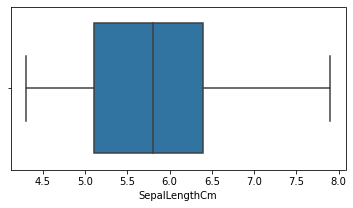

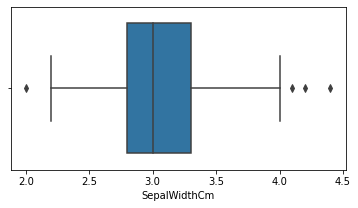

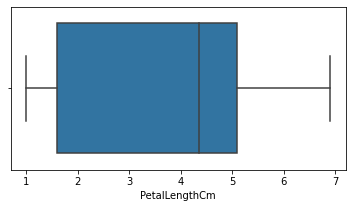

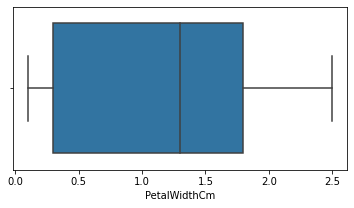

In [6]:
## Check for any outliers in the numeric data
for i in data.columns:
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

In [7]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)
                                                  

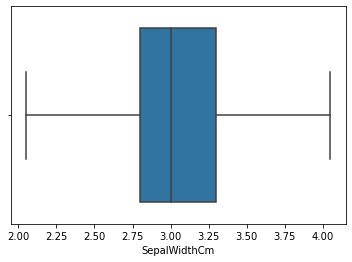

In [8]:
sns.boxplot(data['SepalWidthCm']);

### Understanding the data


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


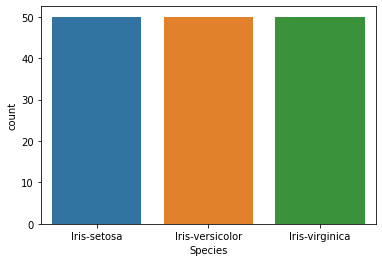

In [9]:
## Target class
print(data.Species.value_counts())
sns.countplot(data.Species);

In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667
std,0.828066,0.423036,1.764420,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


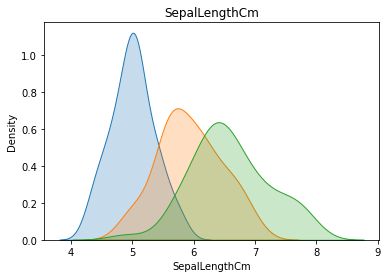

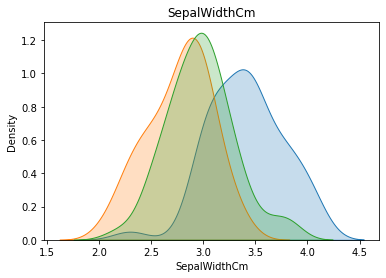

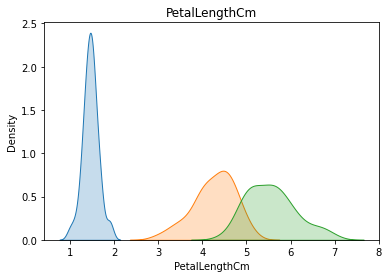

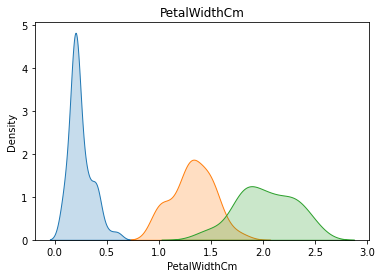

In [11]:
# Distributions of features by Species

for i in data.columns[:-1]:
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show()

We cannot distinguish between the species based on Sepal Length/Width but we can clearly tell setosa apart 
from the other species based on Petal Length/Width

In [12]:
## Correlation Matrix

data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


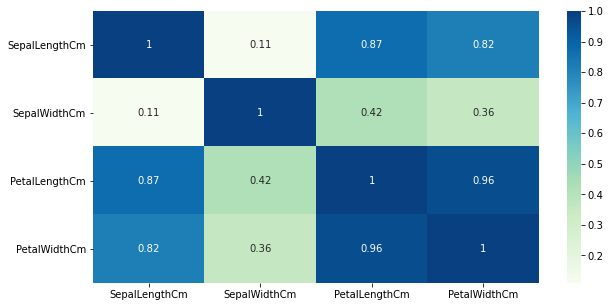

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

### K-means clustering

In [14]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

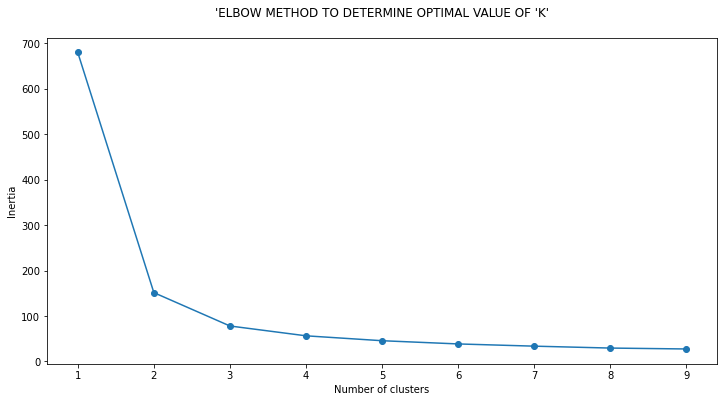

In [15]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [16]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.006     , 3.407     , 1.464     , 0.244     ],
       [5.9016129 , 2.74919355, 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [17]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
data['cluster'] = kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [19]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

1    62
0    50
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

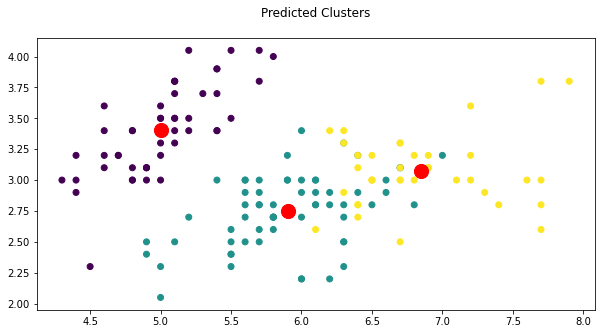

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()

In [21]:
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts() ## the model has identified iris-setosa with 100% accuracy

0    50
Name: cluster, dtype: int64

In [22]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()

1    48
2     2
Name: cluster, dtype: int64

In [23]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

2    36
1    14
Name: cluster, dtype: int64

In [24]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [25]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150



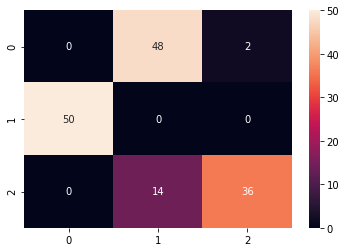

In [26]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);